In [9]:
!pip install stargazer

In [10]:
import pandas as pd
import numpy as np
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

In [11]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file):
    full_path = "https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Lareina/main/Data/sugarprice.csv" + file

    return pd.read_stata(full_path)


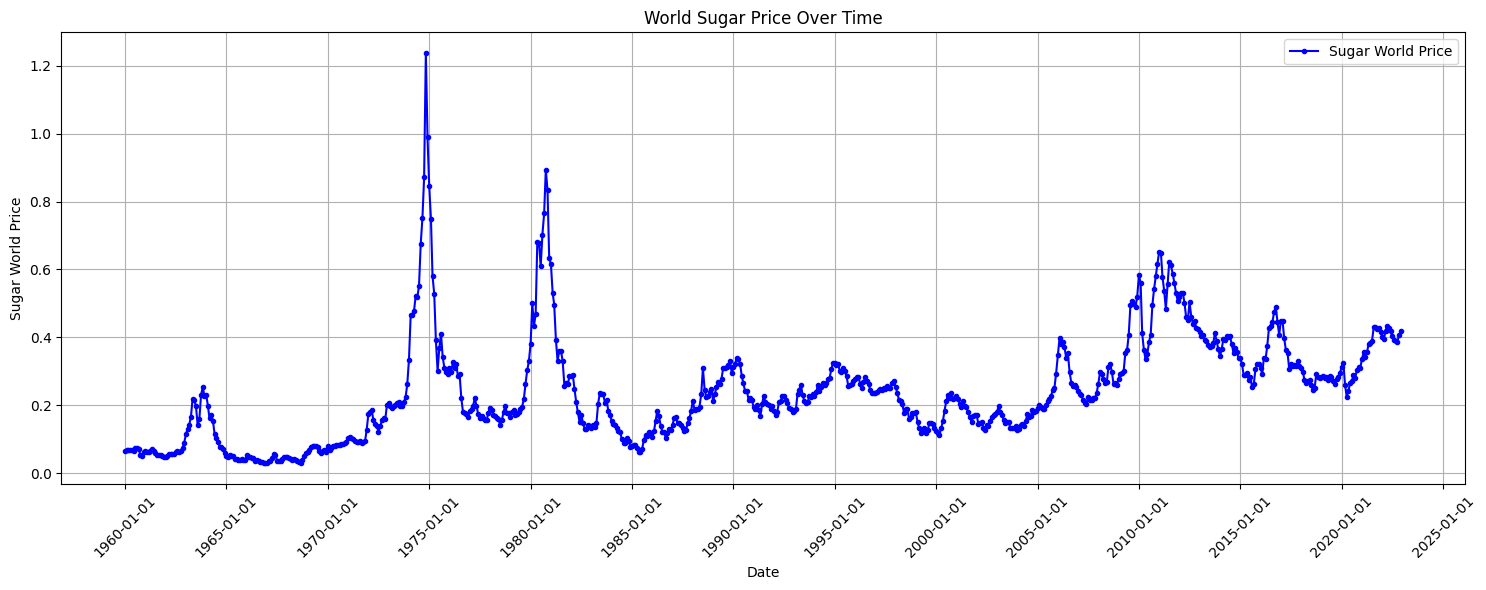

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Lareina/main/Data/sugarprice.csv"
sugar_data = pd.read_csv(url)

# Convert the 'date' column to datetime format
sugar_data['date'] = pd.to_datetime(sugar_data['date'])

# Plotting with specific date format on the x-axis
plt.figure(figsize=(15, 6))
plt.plot(sugar_data['date'], sugar_data['sugar_world'], label='Sugar World Price', color='blue', marker='o', markersize=3)
plt.title('World Sugar Price Over Time')
plt.xlabel('Date')
plt.ylabel('Sugar World Price')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Show ticks every 5 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





In [13]:
import pandas as pd

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Lareina/main/Data/sugarprice.csv"
sugar_data = pd.read_csv(url)

# Convert the 'date' column to datetime format
sugar_data['date'] = pd.to_datetime(sugar_data['date'])

# Filter the dataset for December 1, 1974
dec_1_1974_data = sugar_data[sugar_data['date'] == '1974-12-01']

# Display the data point
print(dec_1_1974_data)


     Unnamed: 0       date  sugar_eu  sugar_us  sugar_world
179         179 1974-12-01  0.320772  1.028235       0.9894


In [25]:
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0
dat.loc[dat.x>50, 'D'] = 1
dat['y1'] = 25 + 0*dat.D + 1.5 * dat.x + np.random.normal(0, 20, dat.shape[0])
dat['y2'] = 25 + 40*dat.D + 1.5 * dat.x + np.random.normal(0, 20, dat.shape[0])
print('"Counterfactual Potential Outcomes')

"Counterfactual Potential Outcomes


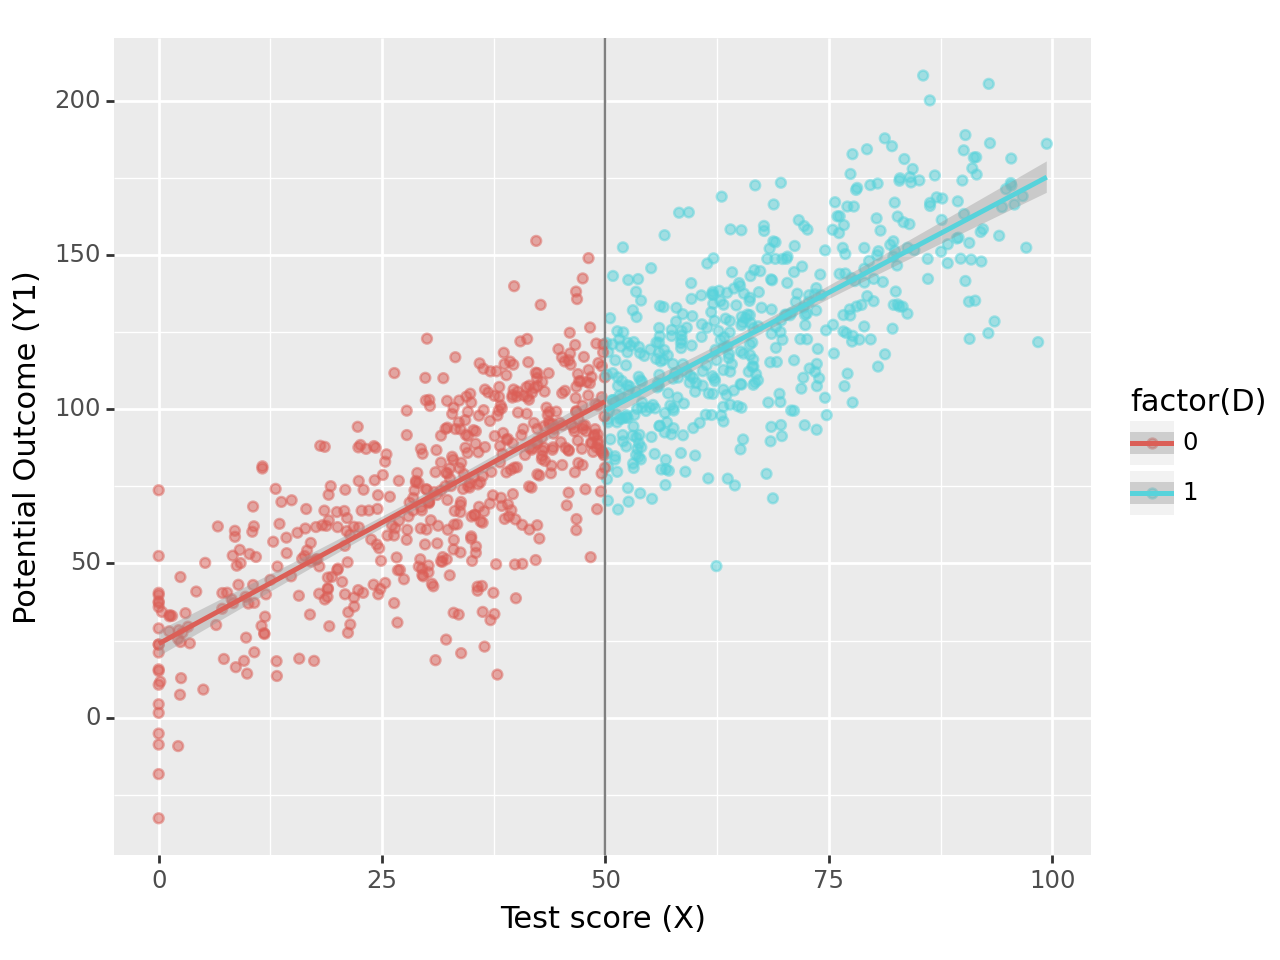

<Figure Size: (640 x 480)>

In [18]:
p.ggplot(dat, p.aes(x='x', y='y1', color = 'factor(D)')) +\
    p.geom_point(alpha = 0.5) +\
    p.geom_vline(xintercept = 50, colour = "grey") +\
    p.stat_smooth(method = "lm", se = 'F') +\
    p.labs(x = "Test score (X)", y = "Potential Outcome (Y1)")

In [ ]:
np.random.seed(12282020)

# Fully interacted regression
all_columns = "+".join(dat.columns.difference(["D", 'y1']))
formula = 'y1 ~ D * ({})'.format(all_columns)

regression = sm.OLS.from_formula(formula, data = dat).fit()
regression.summary()

"Counterfactual Potential Outcomes after Treatment


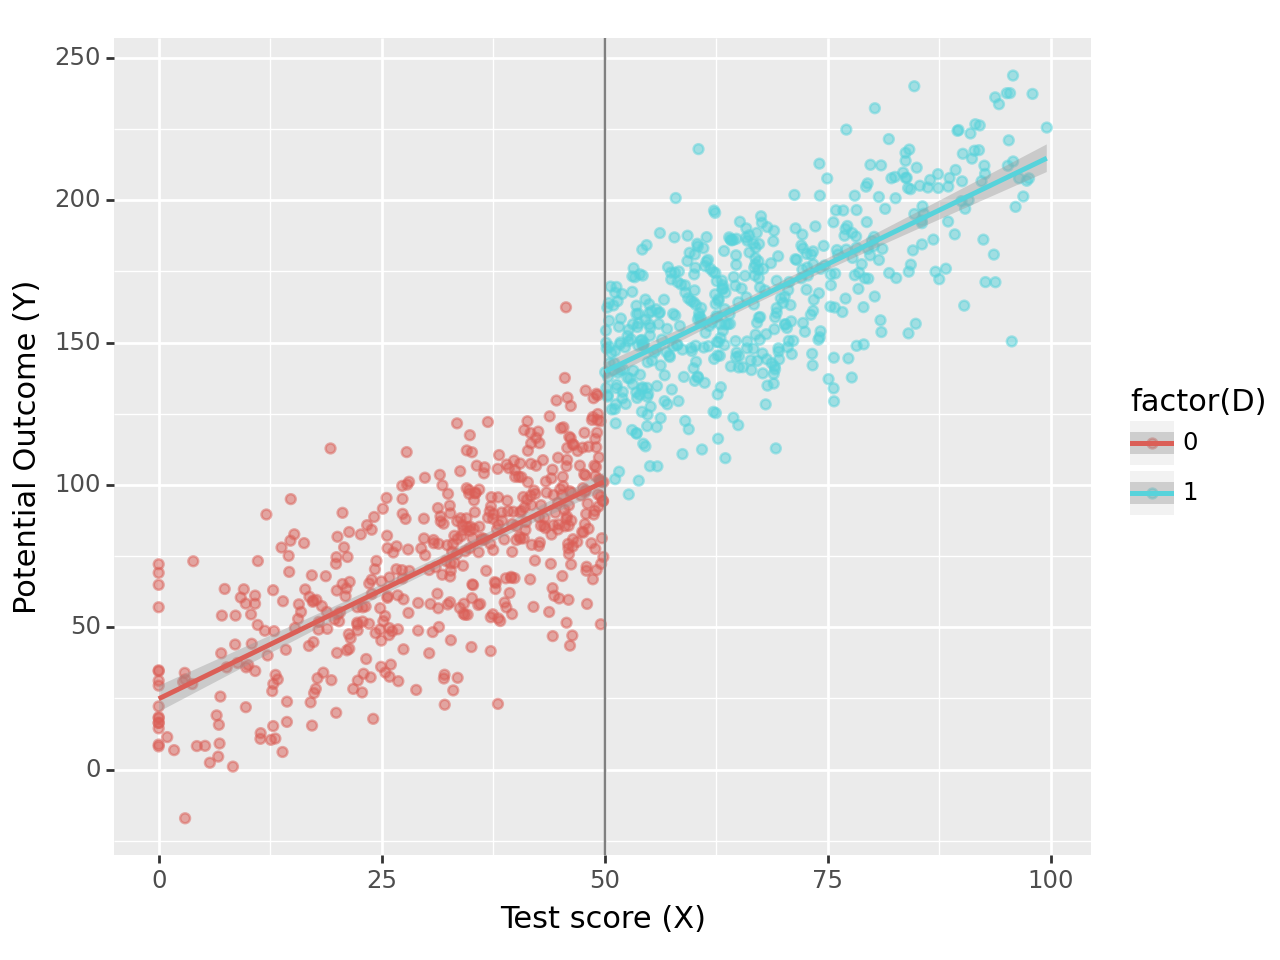

<Figure Size: (640 x 480)>

In [26]:
print('"Counterfactual Potential Outcomes after Treatment')
p.ggplot(dat, p.aes(x='x', y='y2', color = 'factor(D)')) +\
    p.geom_point(alpha = 0.5) +\
    p.geom_vline(xintercept = 50, colour = "grey") +\
    p.stat_smooth(method = "lm", se = 'F') +\
    p.labs(x = "Test score (X)", y = "Potential Outcome (Y)")

In [27]:
np.random.seed(12282020)

# Fully interacted regression
all_columns = "+".join(dat.columns.difference(["D", 'y2']))
formula = 'y2 ~ D * ({})'.format(all_columns)

regression = sm.OLS.from_formula(formula, data = dat).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1233.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:27:11   Log-Likelihood:                -4313.1
No. Observations:                 974   AIC:                             8638.
Df Residuals:                     968   BIC:                             8667.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.1821      2.604     10.440      0.000      22.073      32.291
D             36.4453      5.775      6.311      0.000      25.113      47.778
x              1.6524      0.095     17.380      0.000       1.466       1.839
y1            -0.0864      0.047     -1.852      0.064      -0.178       0.005
D:x           -0.1781      0.141     -1.259      0.208      -0.456       0.100
D:y1           0.1108      0.066      1.680      0.093      -0.019       0.240
==============================================================================
Omnibus:                        3.380   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.185   Jarque-Bera (JB):                3.425
Skew:                          -0.126   Prob(JB):                        0.180
Kurtosis:                       2.857   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
dat = pd.DataFrame({'x': np.random.normal(100, 50, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat['x2'] = dat['x']**2
dat['x3'] = dat['x']**3
dat['D'] = 0
dat.loc[dat.x>140, 'D'] = 1

dat['y3'] = 10000 + 0*dat.D - 100 * dat.x + dat.x2 + np.random.normal(0, 1000, 1000)
dat = dat[dat.x < 280]

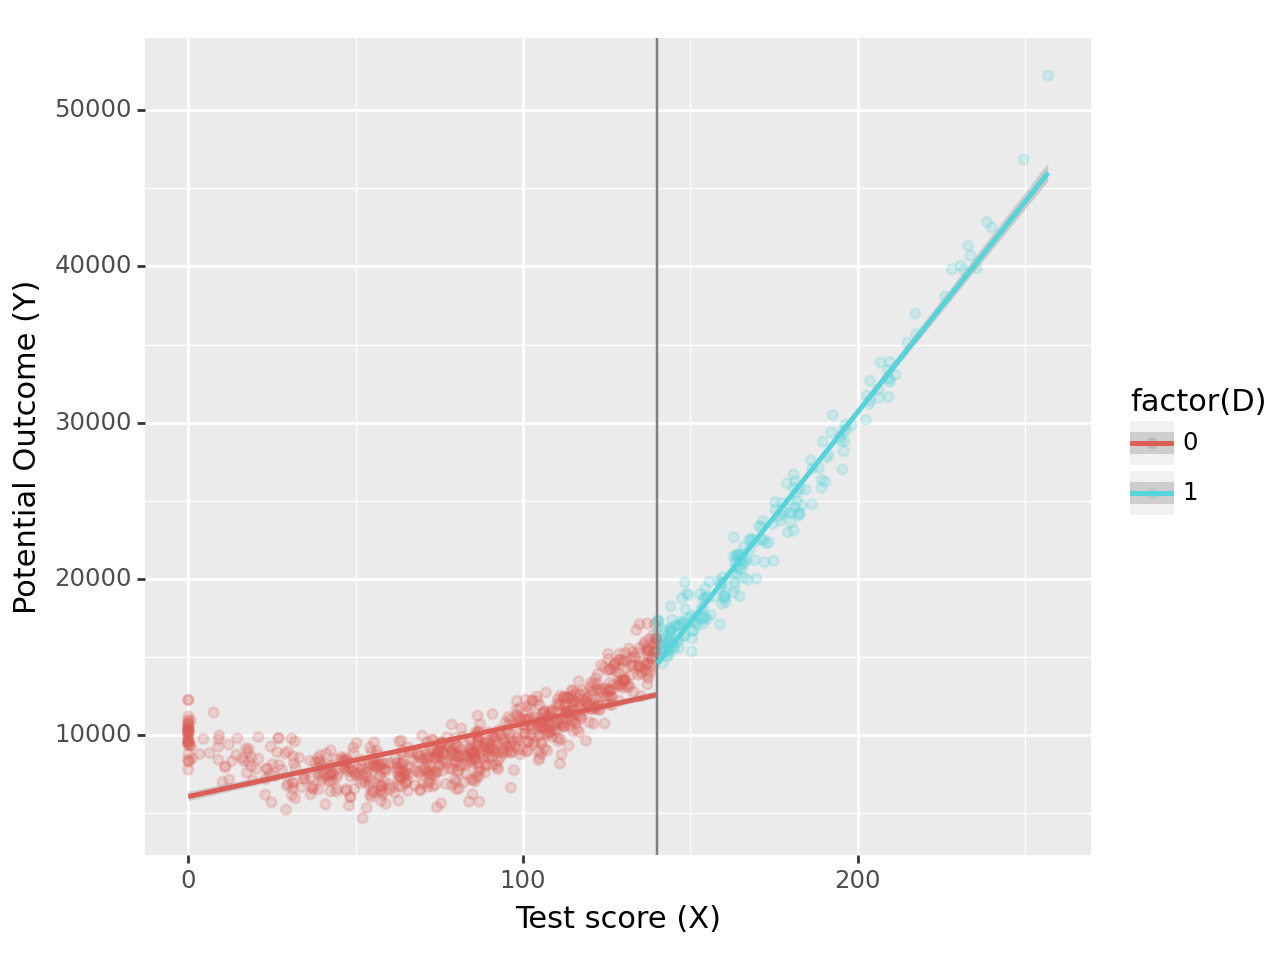

<Figure Size: (640 x 480)>

In [20]:
# Linear Model for conditional expectation
p.ggplot(dat, p.aes(x='x', y='y3', color = 'factor(D)')) +\
    p.geom_point(alpha = 0.2) +\
    p.geom_vline(xintercept = 140, colour = "grey") +\
    p.stat_smooth(method = "lm", se = 'F') +\
    p.labs(x = "Test score (X)", y = "Potential Outcome (Y)")

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


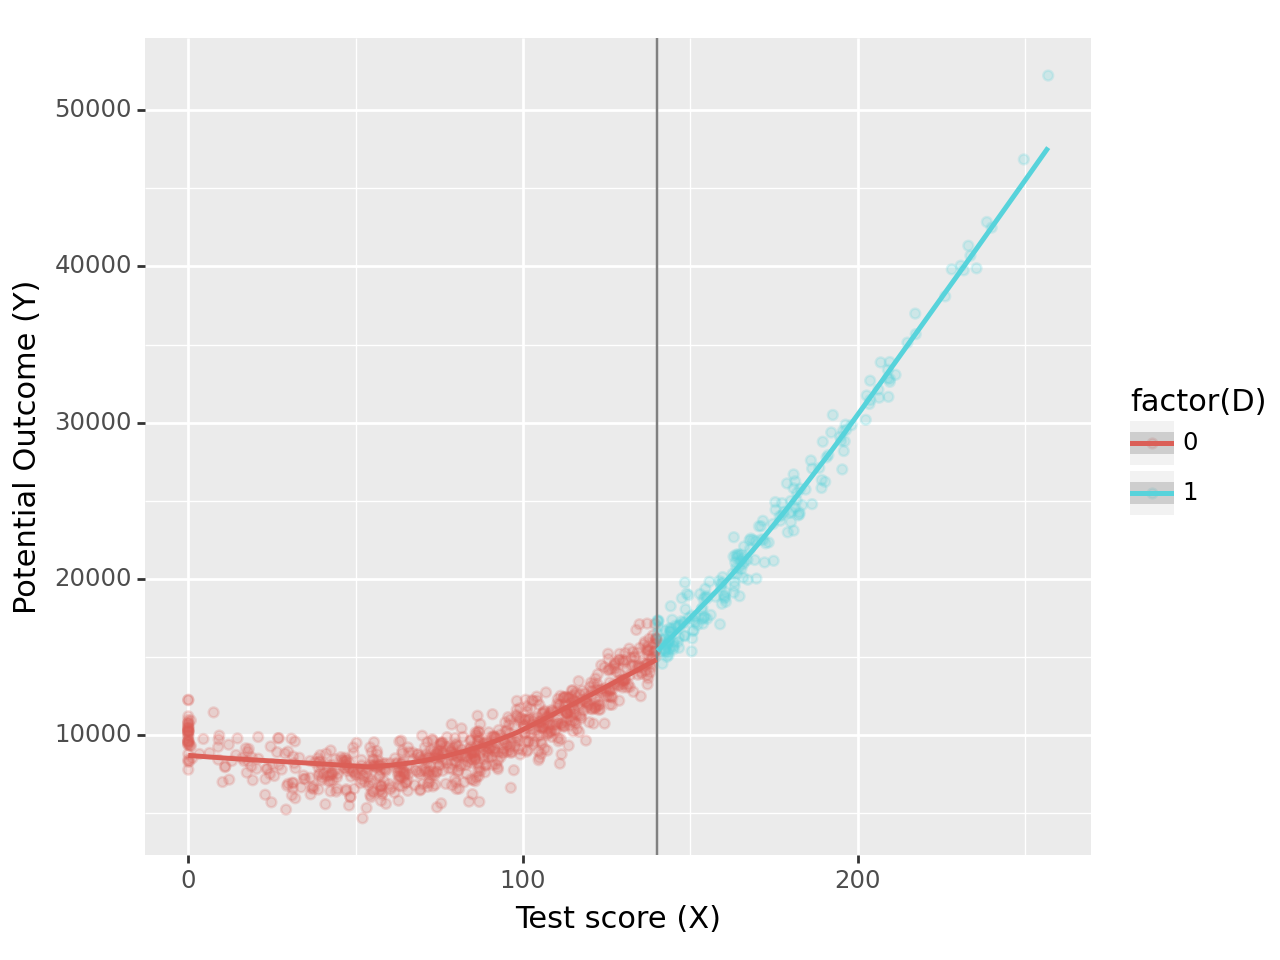

<Figure Size: (640 x 480)>

In [21]:
# Linear Model for conditional expectation
p.ggplot(dat, p.aes(x='x', y='y3', color = 'factor(D)')) +\
    p.geom_point(alpha = 0.2) +\
    p.geom_vline(xintercept = 140, colour = "grey") +\
    p.stat_smooth(method = "lowess", se = 'F') +\
    p.labs(x = "Test score (X)", y = "Potential Outcome (Y)")

In [22]:
np.random.seed(12282020)

# Fully interacted regression
all_columns = "+".join(dat.columns.difference(["D", 'y3']))
formula = 'y3 ~ D * ({})'.format(all_columns)

regression = sm.OLS.from_formula(formula, data = dat).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     6151.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:26:37   Log-Likelihood:                -8286.5
No. Observations:                 998   AIC:                         1.659e+04
Df Residuals:                     990   BIC:                         1.663e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9875.0921    143.192     68.964      0.000    9594.097    1.02e+04
D           -654.5907   1.83e+04     -0.036      0.972   -3.67e+04    3.54e+04
x            -97.1960      8.109    -11.986      0.000    -113.109     -81.283
x2             0.9993      0.134      7.467      0.000       0.737       1.262
x3            -0.0001      0.001     -0.197      0.844      -0.001       0.001
D:x          -10.1840    299.193     -0.034      0.973    -597.309     576.941
D:x2           0.1513      1.606      0.094      0.925      -3.001       3.304
D:x3          -0.0003      0.003     -0.112      0.911      -0.006       0.005
==============================================================================
Omnibus:                        2.954   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                2.877
Skew:                          -0.131   Prob(JB):                        0.237
Kurtosis:                       3.031   Cond. No.                     2.31e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""